# 1. Importing libraries

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import VotingRegressor

# 2. Loading dataset

In [166]:
df = pd.read_csv("dataset/student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3. Splitting data into train/test

In [167]:
np.random.seed(0)
X = df["Hours"].values
y = df["Scores"].values

scalerX = StandardScaler()
scalerY = StandardScaler()

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

X = scalerX.fit_transform(X)
y = scalerY.fit_transform(y)

indices = np.arange(len(X))

(
    X_train, 
    X_test, 
    y_train, 
    y_test, 
    train_indices, 
    test_indices)= train_test_split(X, y, indices, test_size = 0.55, random_state = 70)

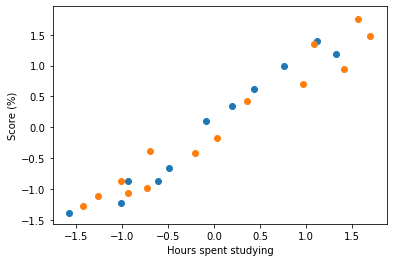

In [168]:
# df.plot.scatter(x="Hours", y="Scores")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

_ = plt.ylabel("Score (%)")
_ = plt.xlabel("Hours spent studying")

# 5. Linear model (least squares)

## 5.1. Training the model

In [169]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## 5.2. Testing the model

In [170]:
y_pred_lin = lm.predict(X_test)

## 5.3. Evaluating the model

In [171]:
MSE_lin = mean_squared_error(y_test,y_pred_lin)
MAE_lin = mean_absolute_error(y_test,y_pred_lin)
R2_lin = r2_score(y_test,y_pred_lin)

evalmetrics = pd.DataFrame(data = [MSE_lin, MAE_lin, R2_lin],
                          columns=["LR"], index=["MSE", "MAE", "R²"])

evalmetrics

,LR
MSE,0.074652
MAE,0.232428
R²,0.929061


## 5.4. Inspection of the test results

In [172]:
y_pred_train = lm.predict(X_train)

In [173]:
y_test = scalerY.inverse_transform(y_test)
y_pred_lin = scalerY.inverse_transform(y_pred_lin)
y_pred_train = scalerY.inverse_transform(y_pred_train)


X_test = scalerX.inverse_transform(X_test)
X_train = scalerX.inverse_transform(X_train)
y_train = scalerY.inverse_transform(y_train)

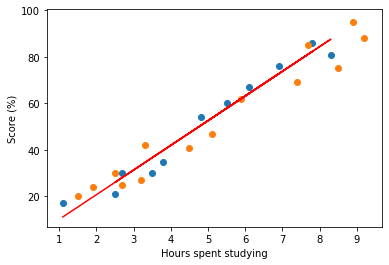

In [174]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred_train, "r")
plt.scatter(X_test, y_test)

_ = plt.ylabel("Score (%)")
_ = plt.xlabel("Hours spent studying")

In [175]:
TestingData=pd.DataFrame(data=y_test, columns=["actual score"])
TestingData['LR predicted score']=y_pred_lin

TestingData

,actual score,LR predicted score
0,75.0,89.688170
1,85.0,81.202839
2,20.0,15.441526
3,24.0,19.684191
4,62.0,62.110845
5,25.0,28.169522
6,41.0,47.261516
7,95.0,93.930836
8,30.0,26.048189
9,42.0,34.533520


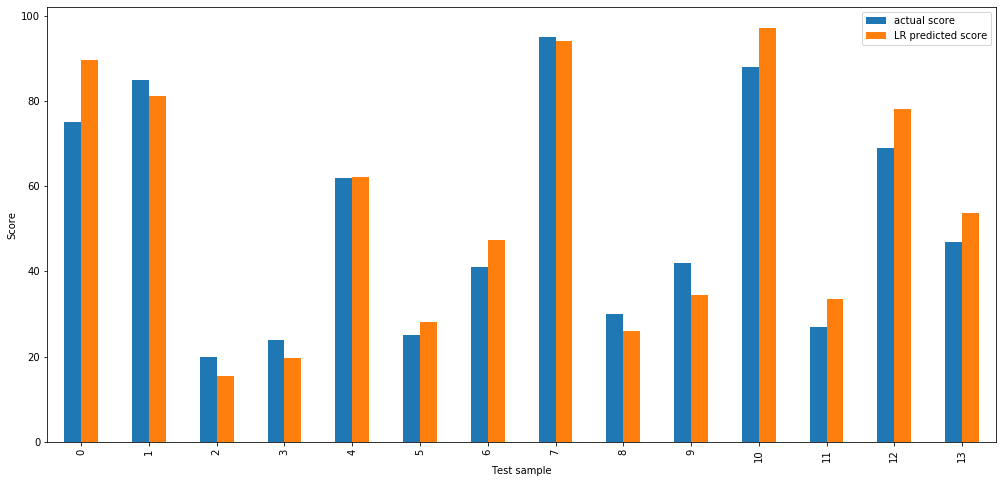

In [176]:
TestingData.plot.bar(figsize=(17, 8))
plt.ylabel("Score")
plt.xlabel("Test sample")
plt.show()

# 6. LASSO Regression

## 6.1. Re-assigning the samples

In [177]:
X = df["Hours"].values
y = df["Scores"].values

scalerX = StandardScaler()
scalerY = StandardScaler()

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

X = scalerX.fit_transform(X)
y = scalerY.fit_transform(y)

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

## 6.2. GridSearch

#### How grid search works

In [178]:
pipeline = Pipeline([
                     ('model',Lasso())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(2.43,2.44,0.001)}, # 0.1,40,0.1
                      cv = 5, scoring='r2',verbose=3
                      )
search_results = search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ................model__alpha=2.43;, score=-0.039 total time=   0.0s
[CV 2/5] END ................model__alpha=2.43;, score=-5.346 total time=   0.0s
[CV 3/5] END ................model__alpha=2.43;, score=-0.103 total time=   0.0s
[CV 4/5] END ................model__alpha=2.43;, score=-0.124 total time=   0.0s
[CV 5/5] END ...............model__alpha=2.43;, score=-11.194 total time=   0.0s
[CV 1/5] END ...............model__alpha=2.431;, score=-0.039 total time=   0.0s
[CV 2/5] END ...............model__alpha=2.431;, score=-5.346 total time=   0.0s
[CV 3/5] END ...............model__alpha=2.431;, score=-0.103 total time=   0.0s
[CV 4/5] END ...............model__alpha=2.431;, score=-0.124 total time=   0.0s
[CV 5/5] END ..............model__alpha=2.431;, score=-11.194 total time=   0.0s
[CV 1/5] END ...............model__alpha=2.432;, score=-0.039 total time=   0.0s
[CV 2/5] END ...............model__alpha=2.432;,

#### Taking off the CV search evolution

In [179]:
search_results_lasso = {}
try_idx = 1

In [180]:
pipeline = Pipeline([
                     ('model',Lasso())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.01,0.1,0.0001)}, # 0.1,40,0.1
                      cv = 5, scoring='r2'
                      )
search_results = search.fit(X_train,y_train)

search_results_lasso[str(try_idx)] ={
    "alpha": search_results.best_params_['model__alpha'],
    "Best CV score": search_results.best_score_
}

try_idx+=1
for try_idx_ in search_results_lasso:
    print("try ", try_idx_, " : ", search_results_lasso[try_idx_])

try  1  :  {'alpha': 0.09309999999999949, 'Best CV score': 0.8761556920574222}


## 6.3. Training, testing and evaluating the LASSO model

In [181]:
lasso_alpha = search.best_params_['model__alpha']

lasso_reg = Lasso(alpha= lasso_alpha)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
MAE_lasso = mean_absolute_error(y_test, y_pred_lasso)
R2_lasso = r2_score(y_test, y_pred_lasso)


evalmetrics["LASSO"] = [MSE_lasso, MAE_lasso, R2_lasso]

evalmetrics

,LR,LASSO
MSE,0.074652,0.054392
MAE,0.232428,0.201915
R²,0.929061,0.948314


## 6.4. Comparing Least squares and LASSO models performances

In [182]:
y_pred_lasso = scalerY.inverse_transform(y_pred_lasso.reshape(-1,1))
y_test = scalerY.inverse_transform(y_test)

In [183]:
comparison = []
for i in range(len(y_test)):
    if np.abs(y_test[i] - y_pred_lin[i]) > np.abs(y_test[i] - y_pred_lasso[i]):
        comparison.append("LASSO is better")
    else:
        comparison.append("LR is better")

In [184]:
TestingData['LASSO predicted score']=y_pred_lasso
TestingData_ = TestingData.copy()
TestingData_['Comparison']=comparison

TestingData_

,actual score,LR predicted score,LASSO predicted score,Comparison
0,75.0,89.688170,85.401419,LASSO is better
1,85.0,81.202839,77.847530,LR is better
2,20.0,15.441526,19.304894,LASSO is better
3,24.0,19.684191,23.081838,LASSO is better
4,62.0,62.110845,60.851281,LR is better
5,25.0,28.169522,30.635727,LR is better
6,41.0,47.261516,47.631976,LR is better
7,95.0,93.930836,89.178363,LR is better
8,30.0,26.048189,28.747255,LASSO is better
9,42.0,34.533520,36.301143,LASSO is better


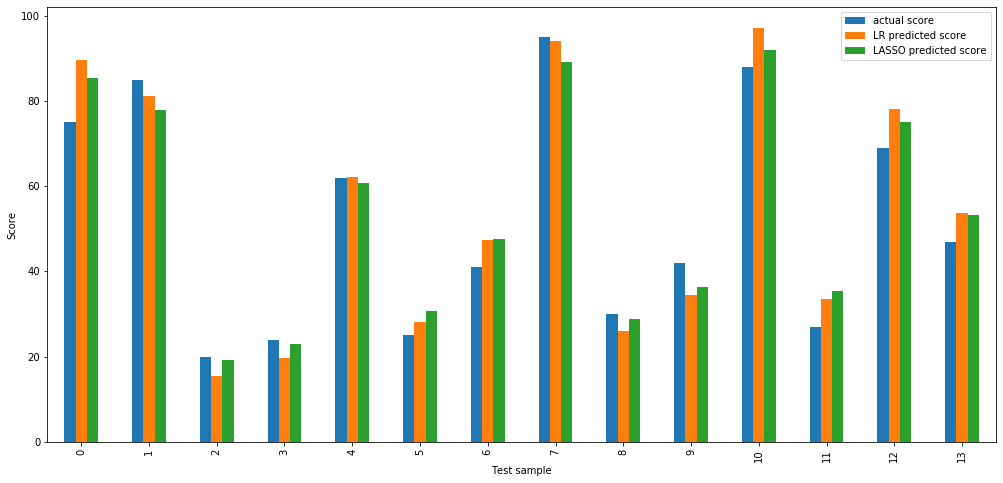

In [185]:
TestingData.plot.bar(figsize=(17, 8))
plt.ylabel("Score")
plt.xlabel("Test sample")
plt.show()

In [186]:
X_test = scalerX.inverse_transform(X_test)
X_train = scalerX.inverse_transform(X_train)

y_train = scalerY.inverse_transform(y_train)

In [187]:
X_plot = np.arange(-1.5,1.5,0.001).reshape(-1,1)
y_plot_pred_lin = lm.predict(X_plot)
y_plot_pred_lasso = lasso_reg.predict(X_plot)

X_plot = scalerX.inverse_transform(X_plot)
y_plot_pred_lin = scalerY.inverse_transform(y_plot_pred_lin)
y_plot_pred_lasso = scalerY.inverse_transform(y_plot_pred_lasso.reshape(-1,1))

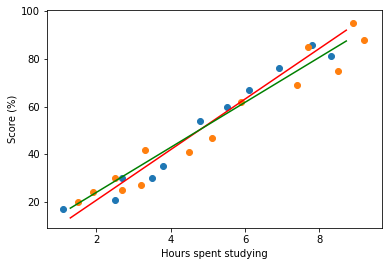

In [188]:
plt.scatter(X_train, y_train)
plt.plot(X_plot,y_plot_pred_lin, "r")
plt.plot(X_plot,y_plot_pred_lasso, "green")
plt.scatter(X_test, y_test)

_ = plt.ylabel("Score (%)")
_ = plt.xlabel("Hours spent studying")

# 7. Ridge Regression

## 7.1. Re-assigning the samples

In [189]:
X = df["Hours"].values
y = df["Scores"].values

scalerX = StandardScaler()
scalerY = StandardScaler()

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

X = scalerX.fit_transform(X)
y = scalerY.fit_transform(y)

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

## 7.2. GridSearch

In [190]:
search_results_ridge = {}
try_idx = 1

In [191]:
pipeline = Pipeline([
                     ('model',Ridge())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.8,0.9,0.0001)}, # 0.1,40,0.1
                      cv = 5, scoring='r2' # neg_mean_squared_error
                      )
search_results = search.fit(X_train,y_train)

search_results_ridge[str(try_idx)] ={
    "alpha": search_results.best_params_['model__alpha'],
    "Best CV score": search_results.best_score_
}

try_idx+=1
for try_idx_ in search_results_ridge:
    print("try ", try_idx_, " : ", search_results_ridge[try_idx_])

try  1  :  {'alpha': 0.8661999999999928, 'Best CV score': 0.8771074551411845}


In [195]:
ridge_alpha

0.8661999999999928

## 7.3. Training, testing and evaluating the Ridge model

In [192]:
ridge_alpha = search.best_params_['model__alpha']

ridge_reg = Ridge(alpha= ridge_alpha)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
MAE_ridge = mean_absolute_error(y_test, y_pred_ridge)
R2_ridge = r2_score(y_test, y_pred_ridge)

evalmetrics["ridge"] = [MSE_ridge, MAE_ridge, R2_ridge]

evalmetrics

,LR,LASSO,ridge
MSE,0.074652,0.054392,0.055754
MAE,0.232428,0.201915,0.207422
R²,0.929061,0.948314,0.947019


## 7.4. Comparing Least squares, LASSO and Ridge models performances

In [57]:
y_pred_ridge = scalerY.inverse_transform(y_pred_ridge.reshape(-1,1))
y_test = scalerY.inverse_transform(y_test)

In [58]:
comparison = []
diff_lin = np.abs(y_test - y_pred_lin)
diff_ridge = np.abs(y_test - y_pred_ridge)
diff_lasso = np.abs(y_test - y_pred_lasso)
for i in range(len(y_test)):
    if diff_lin[i] < diff_ridge[i] and diff_lin[i] < diff_lasso[i]:
        comparison.append("LR is better")
    elif diff_ridge[i] < diff_lin[i] and diff_ridge[i] < diff_lasso[i]:
        comparison.append("ridge is better")
    else:
        comparison.append("lasso is better")

In [59]:
TestingData['Ridge predicted score']=y_pred_ridge
TestingData_ = TestingData.copy()
TestingData_['Comparison']=comparison

TestingData_

,actual score,LR predicted score,LASSO predicted score,Ridge predicted score,Comparison
0,75.0,89.688170,85.401419,86.191708,lasso is better
1,85.0,81.202839,77.847530,78.466102,LR is better
2,20.0,15.441526,19.304894,18.592658,lasso is better
3,24.0,19.684191,23.081838,22.455461,lasso is better
4,62.0,62.110845,60.851281,61.083490,LR is better
5,25.0,28.169522,30.635727,30.181067,LR is better
6,41.0,47.261516,47.631976,47.563680,LR is better
7,95.0,93.930836,89.178363,90.054511,LR is better
8,30.0,26.048189,28.747255,28.249665,lasso is better
9,42.0,34.533520,36.301143,35.975271,lasso is better


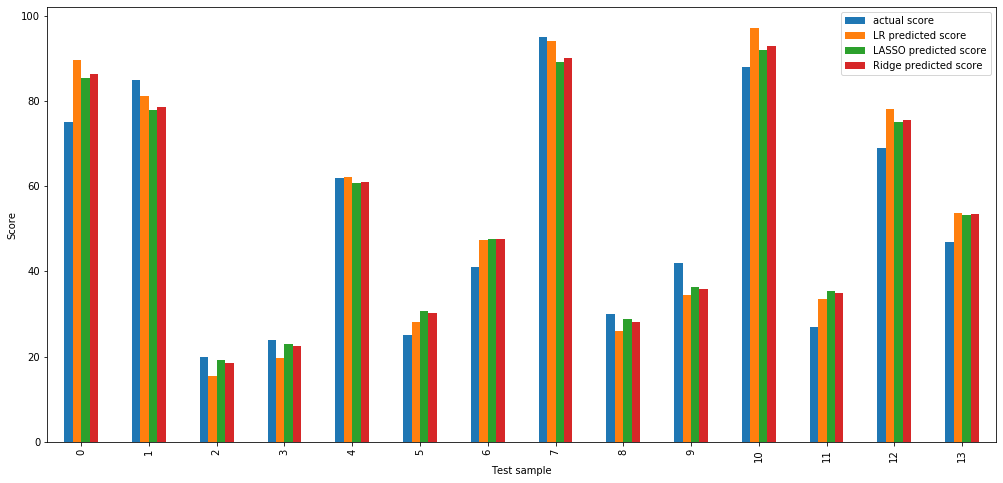

In [60]:
TestingData.plot.bar(figsize=(17, 8))
plt.ylabel("Score")
plt.xlabel("Test sample")
plt.show()

In [39]:
# X_test = scalerX.inverse_transform(X_test)
# X_train = scalerX.inverse_transform(X_train)

# y_train = scalerY.inverse_transform(y_train)

In [40]:
# change to Ridge stuff
# y_plot_pred_lin = lm.predict(X_plot)
# y_plot_pred_lasso = lasso_reg.predict(X_plot)

# X_plot = scalerX.inverse_transform(X_plot)
# y_plot_pred_lin = scalerY.inverse_transform(y_plot_pred_lin)
# y_plot_pred_lasso = scalerY.inverse_transform(y_plot_pred_lasso.reshape(-1,1))

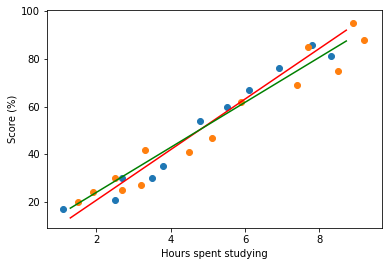

In [41]:
# change to Ridge stuff

# plt.scatter(X_train, y_train)
# plt.plot(X_plot,y_plot_pred_lin, "r")
# plt.plot(X_plot,y_plot_pred_lasso, "green")
# plt.scatter(X_test, y_test)

# _ = plt.ylabel("Score (%)")
# _ = plt.xlabel("Hours spent studying")

# Combining regression models

In [62]:
X = df["Hours"].values
y = df["Scores"].values

scalerX = StandardScaler()
scalerY = StandardScaler()

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

X = scalerX.fit_transform(X)
y = scalerY.fit_transform(y)

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

In [63]:
er = VotingRegressor([
    ('linR', LinearRegression()), 
    ('lassR', Lasso(alpha = lasso_alpha)), 
    ('ridgR', Ridge(alpha = ridge_alpha))], weights=[1, 1, 1])

In [64]:
er.fit(X_train, y_train.flatten())

VotingRegressor(estimators=[('linR', LinearRegression()),
                            ('lassR', Lasso(alpha=0.09309999999999949)),
                            ('ridgR', Ridge(alpha=0.8661999999999928))],
                weights=[1, 1, 1])

In [65]:
y_pred_er = er.predict(X_test)
MSE_er = mean_squared_error(y_test, y_pred_er)
MAE_er = mean_absolute_error(y_test, y_pred_er)
R2_er = r2_score(y_test, y_pred_er)

evalmetrics["LR + LASSO + Ridge"] = [MSE_er, MAE_er, R2_er]

evalmetrics

,LR,LASSO,ridge,LR + LASSO + Ridge
MSE,0.074652,0.054392,0.055754,0.058620
MAE,0.232428,0.201915,0.207422,0.213709
R²,0.929061,0.948314,0.947019,0.944296


In [66]:
# y_pred_er = scalerY.inverse_transform(y_pred_er.reshape(-1,1))
# y_test = scalerY.inverse_transform(y_test)

In [67]:
# TestingData2=pd.DataFrame(data=y_test, columns=["actual score"])
# TestingData2['LR predicted score']=y_pred_lin
# TestingData2['Combined models predicted score']=y_pred_er

# TestingData2.plot.bar(figsize=(17, 8))
# plt.ylabel("Score")
# plt.xlabel("Test sample")
# plt.show()

### GridSearch for combining LR + LASSO + Rigde

In [148]:
X = df["Hours"].values
y = df["Scores"].values

scalerX = StandardScaler()
scalerY = StandardScaler()

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

X = scalerX.fit_transform(X)
y = scalerY.fit_transform(y)

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

In [155]:
search_results_er = {}
try_idx = 1

In [159]:
er = VotingRegressor([
    ('linR', LinearRegression()), 
    ('lassR', Lasso(alpha = lasso_alpha)), 
    ('ridgR', Ridge(alpha = ridge_alpha))])

params = {'weights':[[1, x, 1] for x in np.arange(0.1,40,0.1)]} # 0.1,40,0.1
grid_Search = GridSearchCV(param_grid = params, cv = 5, scoring='r2', estimator=er)

search_results = grid_Search.fit(X_train,y_train.ravel())
search_results_er[str(try_idx)] ={
    "weight": search_results.best_params_['weights'],
    "Best CV score": search_results.best_score_
}

try_idx+=1
for try_idx_ in search_results_er:
    print("try ", try_idx_, " : ", search_results_er[try_idx_])

try  1  :  {'weight': {'weights': [1, 39.900000000000006]}, 'Best CV score': 0.8770848118007667}
try  2  :  {'weight': {'weights': [1, 79.90000000000057]}, 'Best CV score': 0.8770960114481727}
try  3  :  {'weight': {'weights': [1, 119.89999999999768]}, 'Best CV score': 0.8770997985056643}
try  4  :  {'weight': {'weights': [1, 129.89999999999938]}, 'Best CV score': 0.8771003835550868}


In [160]:
new_weights = search_results.best_params_['weights']
er = VotingRegressor([
    ('linR', LinearRegression()), 
    ('lassR', Lasso(alpha = lasso_alpha)), 
    ('ridgR', Ridge(alpha = ridge_alpha))], weights=new_weights)

er.fit(X_train, y_train.flatten())

y_pred_er = er.predict(X_test)
MSE_er = mean_squared_error(y_test, y_pred_er)
MAE_er = mean_absolute_error(y_test, y_pred_er)
R2_er = r2_score(y_test, y_pred_er)

evalmetrics["LR + LASSO + Ridge"] = [MSE_er, MAE_er, R2_er]

evalmetrics

,LR,LASSO,ridge,LR + LASSO + Ridge,LASSO + Ridge
MSE,0.074652,0.054392,0.055754,0.058620,0.055754
MAE,0.232428,0.201915,0.207422,0.213709,0.207422
R²,0.929061,0.948314,0.947019,0.944296,0.947019


In [124]:
# y_pred_er = scalerY.inverse_transform(y_pred_er.reshape(-1,1))
# y_test = scalerY.inverse_transform(y_test)

In [125]:
# comparison = []
# diff_lin = np.abs(y_test - y_pred_lin)
# diff_er = np.abs(y_test - y_pred_er)
# diff_lasso = np.abs(y_test - y_pred_lasso)
# for i in range(len(y_test)):
#     if diff_lin[i] < diff_er[i] and diff_lin[i] < diff_lasso[i]:
#         comparison.append("LR is better")
#     elif diff_er[i] < diff_lin[i] and diff_er[i] < diff_lasso[i]:
#         comparison.append("er is better")
#     else:
#         comparison.append("lasso is better")

In [126]:
# TestingData['ER predicted score']=y_pred_er
# TestingData_ = TestingData.copy()
# TestingData_['Comparison']=comparison

# TestingData_

,actual score,LR predicted score,LASSO predicted score,Ridge predicted score,ER predicted score,Comparison
0,75.0,89.688170,85.401419,86.191708,85.407501,lasso is better
1,85.0,81.202839,77.847530,78.466102,77.852291,LR is better
2,20.0,15.441526,19.304894,18.592658,19.299412,lasso is better
3,24.0,19.684191,23.081838,22.455461,23.077017,lasso is better
4,62.0,62.110845,60.851281,61.083490,60.853068,LR is better
5,25.0,28.169522,30.635727,30.181067,30.632228,LR is better
6,41.0,47.261516,47.631976,47.563680,47.631450,LR is better
7,95.0,93.930836,89.178363,90.054511,89.185107,LR is better
8,30.0,26.048189,28.747255,28.249665,28.743425,lasso is better
9,42.0,34.533520,36.301143,35.975271,36.298635,lasso is better
